In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import os
import math

class RawData(object):
    def __init__(self,trial,fitts,target,x,y,tx,ty,targetRadius,targetdistance,distance,traveldistance,time):
        self.trial=trial
        self.fitts=fitts
        self.target=target
        self.x=x
        self.y=y
        if(self.target==0):
            self.tx=targetdistance*math.cos(0)
            self.ty=targetdistance*math.sin(0)
        self.tx=tx
        self.ty=ty
        self.targetRadius=targetRadius
        self.targetdistance=targetdistance
        self.distance=distance#math.sqrt((x-self.tx)**2+(y-self.ty)**2)
        self.traveldistance=traveldistance
        self.time=time
        self.ID=math.log2(1+self.targetdistance/(2*self.targetRadius))
        

def read_data(file,rawdata):
    seperator="\t"
    with open(file,"r") as fp:
        for line in fp:
            if line.startswith("trial"):
                continue
            l=line[:-1]
            f=l.split(seperator)
            if(len(f)>13):
                rawdata.append(RawData(int(f[0]),float(f[2]),float(f[3]),float(f[4]),float(f[5]),float(f[6]),float(f[7]),float(f[8]),float(f[9]),float(f[10]),float(f[11]),float(f[12])))
    return rawdata


plotData=False;

AllTime=[[],[],[],[]]

def plotTrial(raw_data,trial,fig,raw,col,idx):
    #fig = plt.figure()
    colors = ["r", "b", "g","k"]
    ret=[]
    for i in range(4):
        tx=[a.tx for a in raw_data if a.trial==trial and a.fitts==i and a.target!=-1]
        ty=[a.ty for a in raw_data if a.trial==trial and a.fitts==i and a.target!=-1]
        x=[a.x for a in raw_data if a.trial==trial  and a.fitts==i and a.target!=-1]
        y=[a.y for a in raw_data if a.trial==trial and a.fitts==i and a.target!=-1]
        d=[(a.distance) for a in raw_data if a.trial==trial and a.fitts==i and a.target!=-1]
        td=[a.traveldistance for a in raw_data if a.trial==trial and a.fitts==i and a.target!=-1]
        time=[a.time for a in raw_data if a.trial==trial and a.fitts==i and a.target!=-1]
        time=time[1:]
        td=td[1:]
        time=[t for t in time if t<10]
        d=[v for v in d if v<60]

        Ae=np.average(td[1:])
        We=4.133*np.std(d)
        
        t=np.average(time)
        AllTime[trial].extend(time)
        
        IDe=math.log2(1+Ae/We)
        TP=IDe/t
        ret.append(TP)

        #print("Trial="+str(i+1))
        #print("Ae=",Ae)
        #print("We=",We)
        #print("IDe=",IDe)
        if(plotData):
            ax = fig.add_subplot(raw,col,idx+i)
            mpl.rcParams['legend.fontsize'] = 7

            ax.scatter(tx,ty)
            ax.scatter(x, y,  label='tid:'+str(i), color="g")

            for j in range(len(x)):
                sx=[x[j],tx[j]]
                sy=[y[j],ty[j]]
                ax.plot(sx,sy,color="r")
                ax.annotate(str(d[j]),(tx[j],ty[j]))
    #ax.legend()
    return ret

def read_plot(path,trial,raw,fig):
    raw_data=[]
    raw_data=read_data(path,raw_data)
    return plotTrial(raw_data,trial,fig,4,4,raw*4+1)
    
    #return raw_data


4


/Users/leon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/leon/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/leon/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/leon/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/leon/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: min() arg is an empty sequence

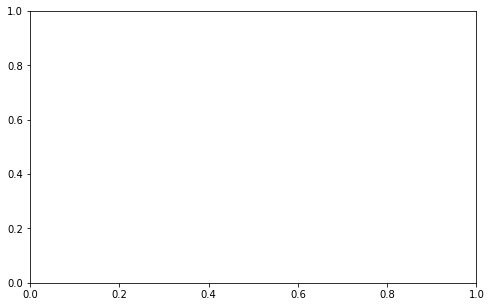

In [2]:

IDeArr=[]
for uid in range(14):
    baseFolder=str(uid+1)

    idx=[1,2,3,4]

    if(os.path.isdir("../"+baseFolder)==False):
        continue
    if(plotData):
        fig = plt.figure(figsize=(32, 32)) 
    else:
        fig=0
    trial=[]
    for i in range(len(idx)):
        r=read_plot("../"+baseFolder+"/_ExpA_"+str(idx[i])+".xls",i,i,fig)
        trial.append(r)
    #print(trial)
    IDeArr.append(trial)
    if(plotData):
        plt.savefig("../"+baseFolder+"/pltA.pdf")
        plt.show()
        
        

ind = np.arange(4) 
fig, ax = plt.subplots(figsize=(8,5))
width = 0.6       # the width of the bars
w=width/2.0

print(len(ind))
colors=["r","g","b","y"]


def autolabel(rects,vals):
    """
    Attach a text label above each bar displaying its height
    """
    for i in range(len(rects)):
        rect=rects[i]
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2. - 0.1, 1.05*height,
                '{0:.2f}'.format(vals[i]),
                ha='center', va='bottom')
     
means=[]
err=[]   
allV=[]
for i in range(4):#sessions
    #print("Session:",i)
    vals=[]
    for j in range(4):#trials
        #print("Trial:",j)
        v=[a[i][j] for a in IDeArr]
        vals.append(v)
    mean=np.mean(v)
    std=np.std(v)
    means.append(mean)
    err.append(std)
    allV.extend(v)
    
    print("time: min={0:.2f},max={1:.2f},mean={2:.2f},std={3:.2f}".format(min(AllTime[i]),max(AllTime[i]),np.mean(AllTime[i]),np.std(AllTime[i])))
    print("{0:.2f},{1:.2f}".format(mean, std))
    

mean=np.mean(allV)
std=np.std(allV)
allTimeFlatted= [item for sublist in AllTime for item in sublist]
print("time: min={0:.2f},max={1:.2f},mean={2:.2f},std={3:.2f}".format(min(allTimeFlatted),max(allTimeFlatted),np.mean(allTimeFlatted),np.std(allTimeFlatted)))
print("{0:.2f},{1:.2f}".format(mean, std))
rects=ax.bar(ind+w,means,width, color=(0.5,0.7,1),yerr=err,label="Session "+str(i+1),capsize=5)
w=w+ width
autolabel(rects,means)
        

ax.set_xticks(ind + width / 2)
#ax.set_xticklabels(indName)
ax.grid()

indName=["1","2","3","4"]
ax.set_xlabel("Session")
ax.set_ylabel("Throughput (bits/s)")
ax.set_xticklabels(indName)
#plt.title("Throughput of all participants over four sessions")
plt.tight_layout()
#plt.legend()
plt.savefig("../throughput.pdf")
plt.show()